# Basic usage of `combine_plots`

Here we demonstrate the basic usage of `combine_plots`, which combines the given plots in a specified way. Below we first import the module needed for showing images in the jupyter notebook.

In [1]:
from IPython.display import Image

Before we show some examples, let's first take a look at what arguments can be passed to `combine_plots`. In the example below, we assume that the user has been properly installed the package such that the command `combine_plots` is available.

In [2]:
%%bash
combine_plots -h

usage: combine_plots [-h] [-f FIGS [FIGS ...]] [-d DIMENSION [DIMENSION ...]]
                     [-s SIZE [SIZE ...]] [-t TITLES [TITLES ...]] [-b]
                     [-n PNGNAME] [-e] [-se SIZE_E] [-pe POS_E [POS_E ...]]
                     [-be] [-bgr]

This code combines the given plots in a specified way.

optional arguments:
  -h, --help            show this help message and exit
  -f FIGS [FIGS ...], --figs FIGS [FIGS ...]
                        The filenames of the figures to be combined. Wildcards
                        can be used.
  -d DIMENSION [DIMENSION ...], --dimension DIMENSION [DIMENSION ...]
                        The dimension of the subplots (n_cols, n_rows) in the
                        new figure.
  -s SIZE [SIZE ...], --size SIZE [SIZE ...]
                        The size of the new figure (length, width). By
                        default, the size will be automatically estimated to
                        enable a tight layout of the new figure.
  -t

As can be found in the help message above, `combine_plots` allows the following two ways of combining the input figures.

- Method 1: Making the input figures as the subplots of the newly generated figure. This is the default method when the flag `-e` is not used.
- Method 2: Embedding the second input figure in the first one. This is enabled by using the flag `-e`, also, flags such as `-se`, `-pe`, and `-be`, `-bgr` are only effective if `-e` is used.

In this tutorial, we use `HILLS_2D` in the folder `MD_plotting_toolkit/data` as the input data to demonstrate each of the two methods of combining the input figures. 

## Example 1: Making the input figures as the subplots of the new figure

To show how the input figures can be combined using the first method, let's use the following command to vary the truncation fraction for plotting the Gaussian height as a functino of time and generate 4 figures.

In [3]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
for i in $(seq 10 10 40);
do
    plot_xy -i ${hills} -x "Time (ps)" -y "Dihedral (rad)" -t "Truncation fraction: ${i}%" -n "dihedral_truncate_${i}" -tr ${i};
done


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time (ps) -y Dihedral (rad) -t Truncation fraction: 10% -n dihedral_truncate_10 -tr 10
Analyzing the file ... 
Plotting and saving figure ...
The average of dihedral: -0.006 (RMSF: -276.496, max: 3.140, min: -3.138)
The maximum of dihedral occurs at 2752.000 ps.
The minimum of dihedral occurs at 1750.000 ps.
The dihedral (-0.005 rad) at 2495.000 ps is closet to the average.
Figure(640x480)

Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time 

To combine the 4 figures using the first method, we can use the following simple command. Note that wildcards are available.

In [4]:
%%bash
combine_plots -f dihedral_truncate_*.png -n dihedral_combined -b

Method 1 of combination is used: The input figures will be made subplots in the new figure.


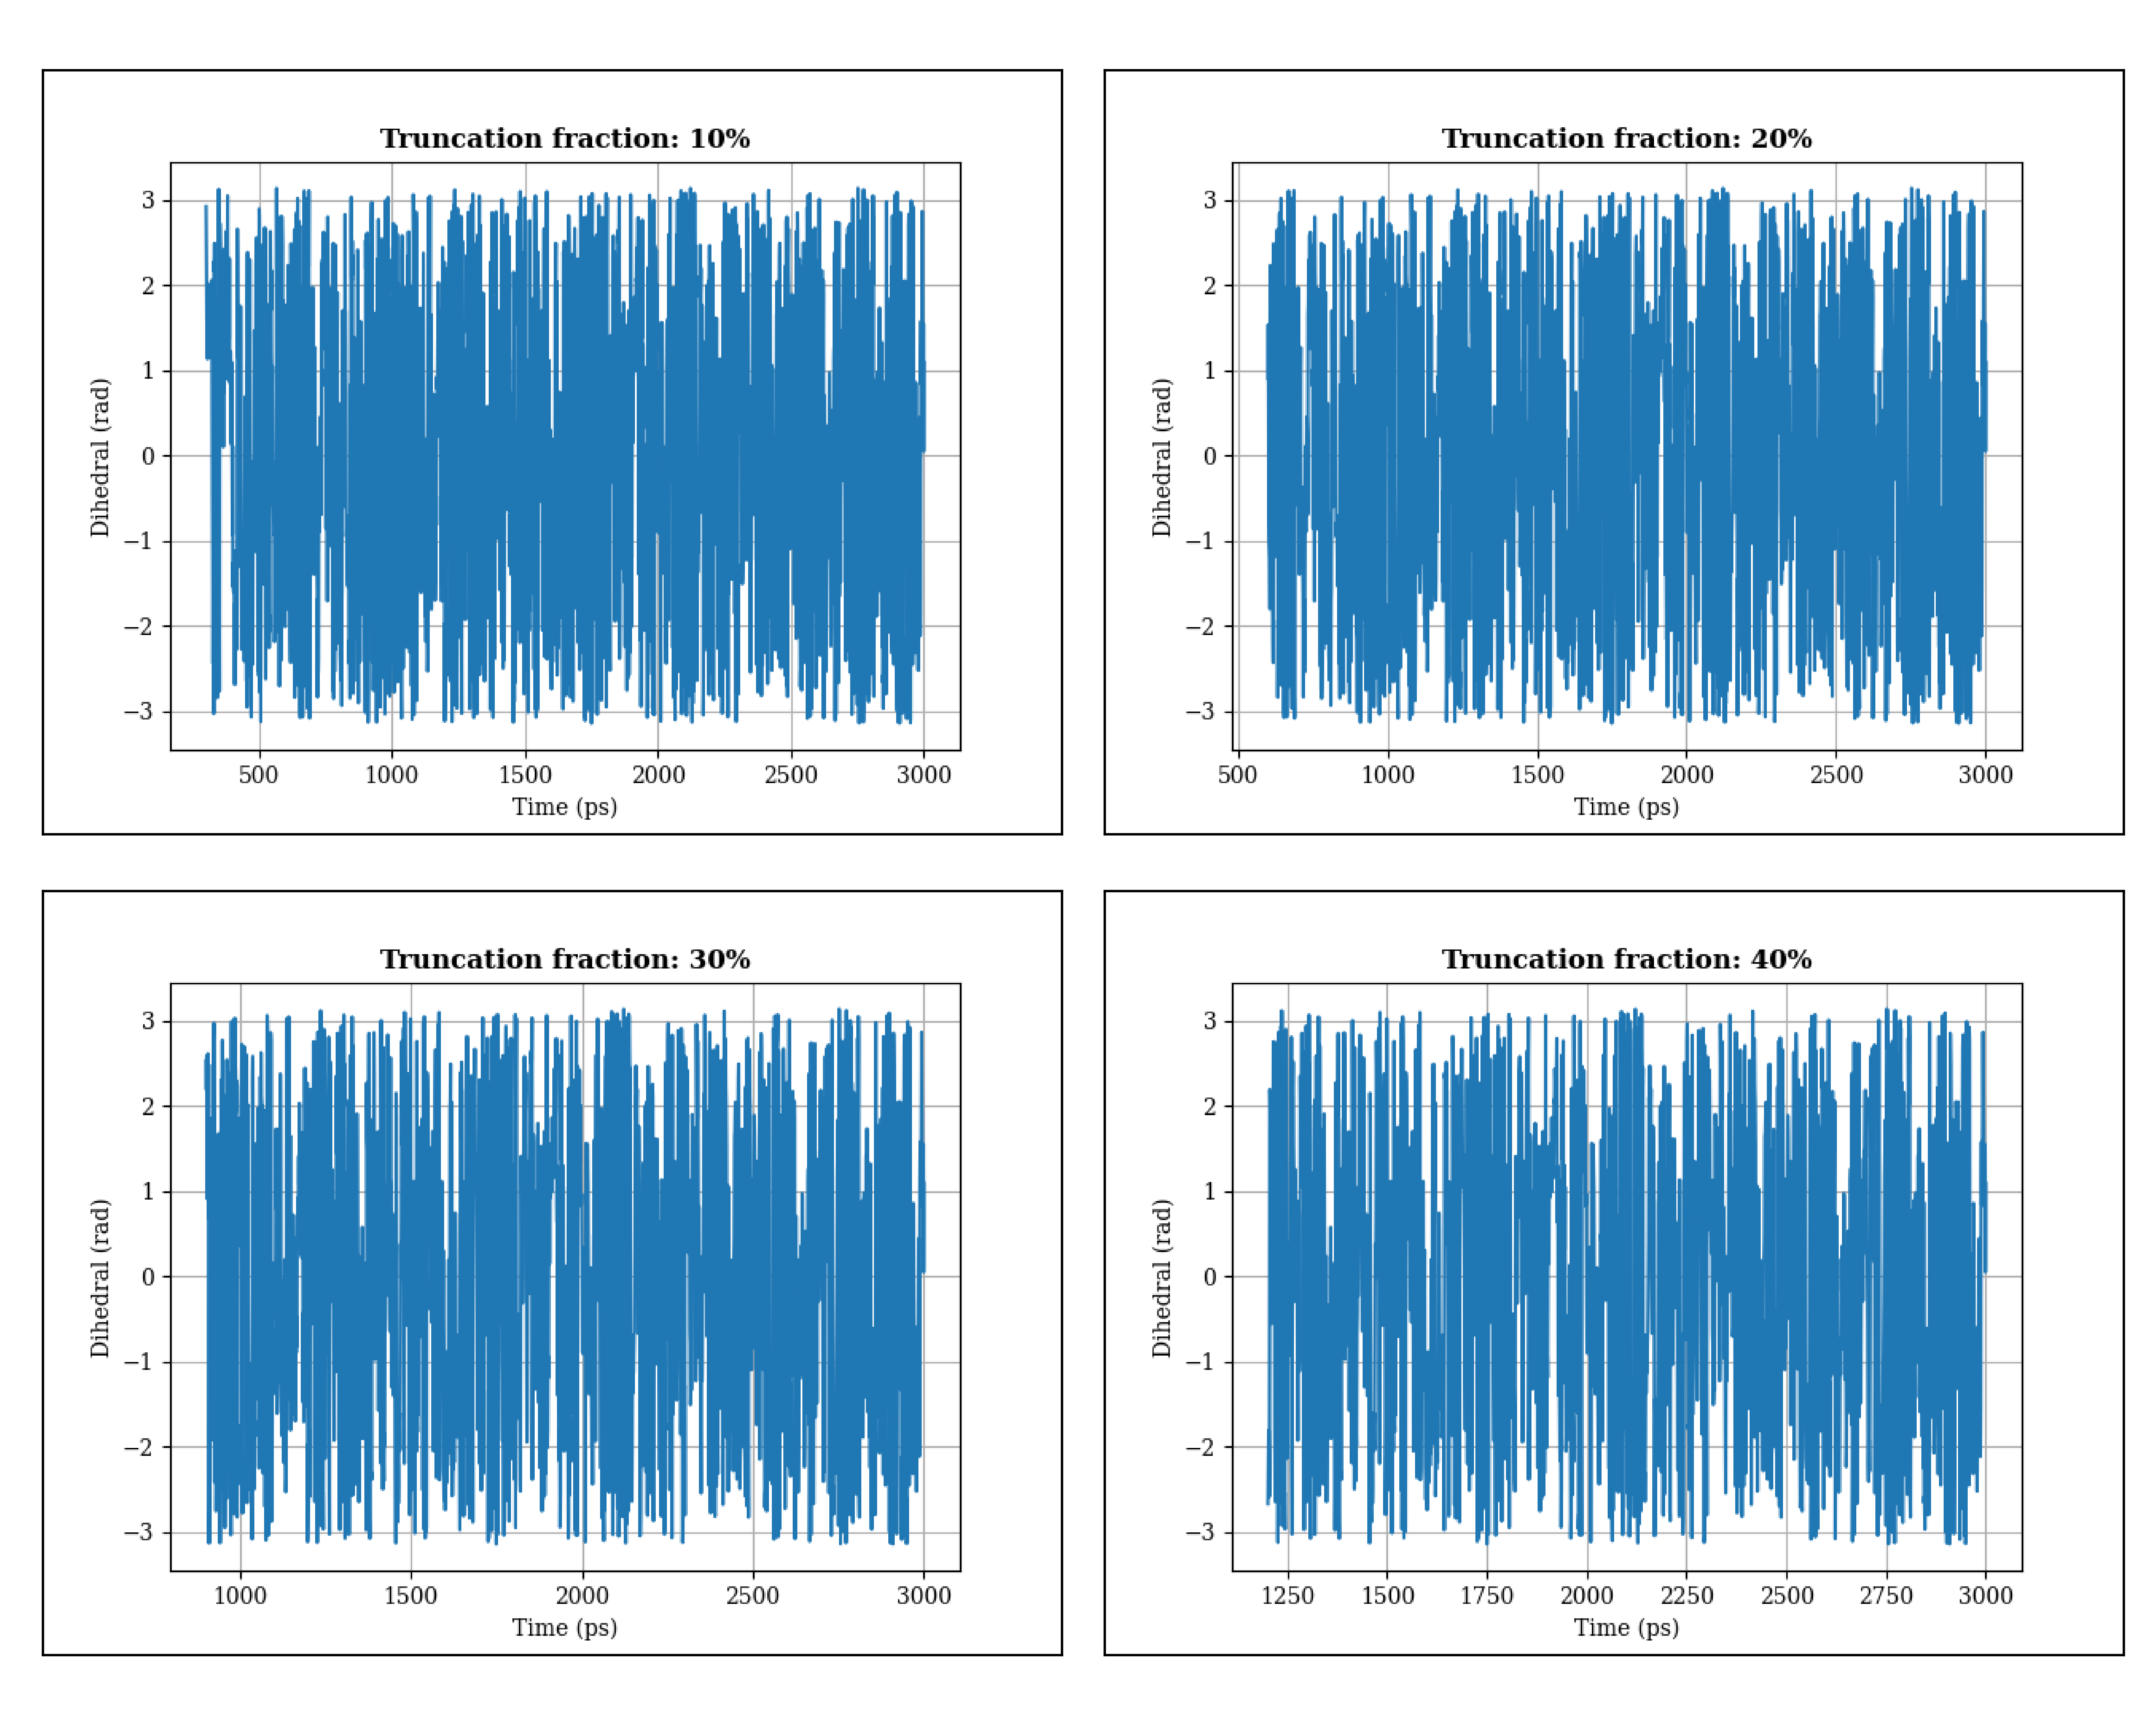

In [5]:
Image('dihedral_combined.png', width=800)

As shown above, by default, the figures are arrange such that the new figure is as square as possible. To arrange the figures in ways different from the default, the user can use the flag `-d` as below.

In [6]:
%%bash
combine_plots -f dihedral_truncate_*.png -n dihedral_combined -b -d 4 1

Method 1 of combination is used: The input figures will be made subplots in the new figure.


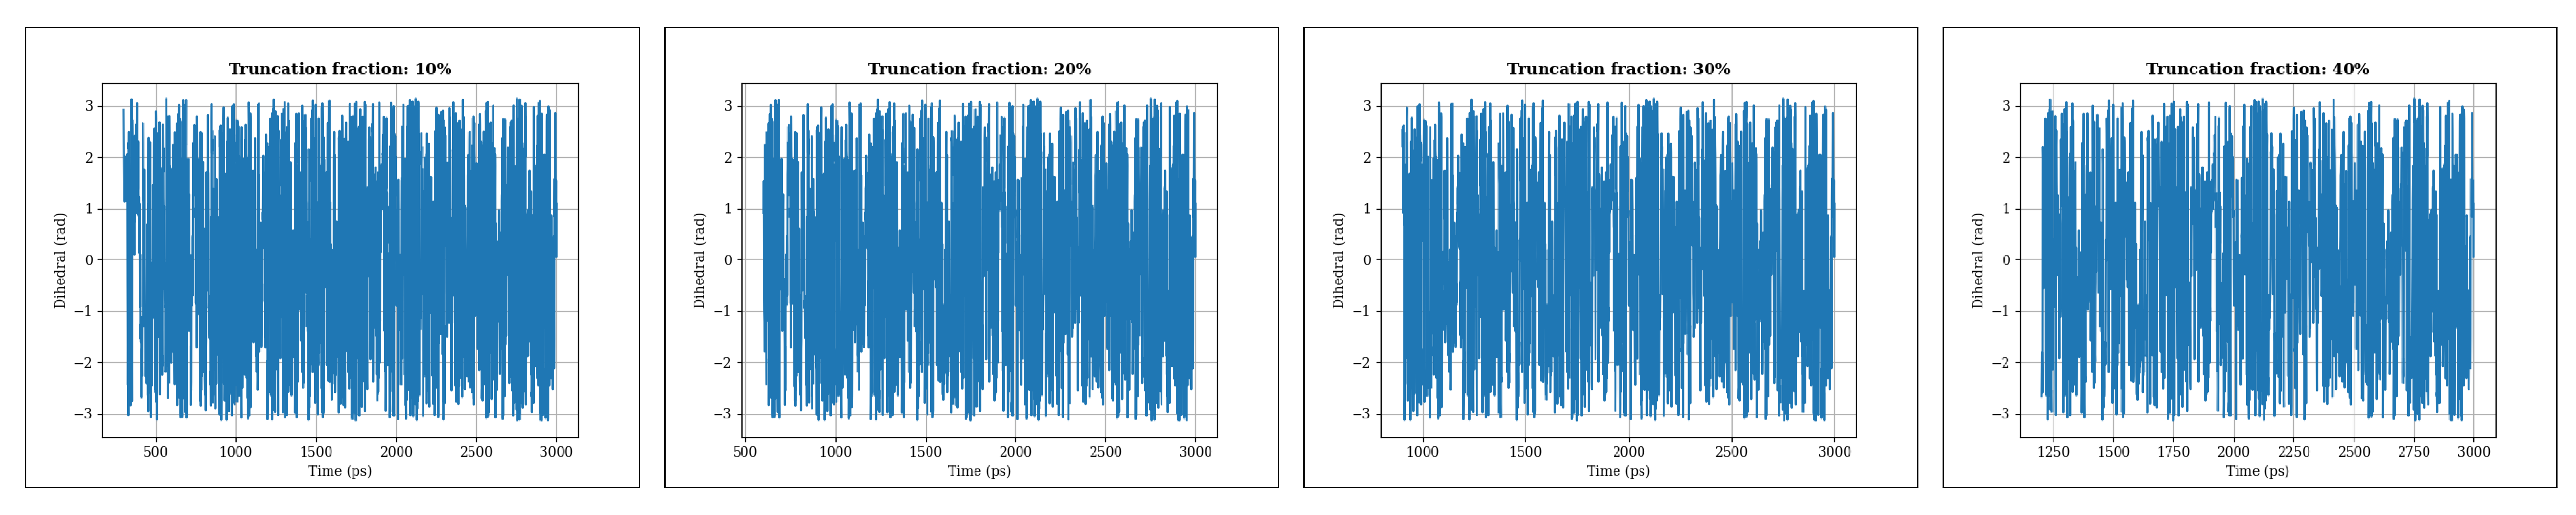

In [7]:
Image('dihedral_combined.png', width=1200)

## Example 2: Embed the first input figure in the second

Here we show an example of `combine_plots` using the other method to combine 2 figures, which is to embed the second one in the first one. Again, before we show the command, let's generate 2 figures to be combined later.

In [8]:
%%bash
hills=../../MD_plotting_toolkit/data/HILLS_2D  # just to shorten the command below
plot_xy -i ${hills} -x "Time (ps)" -y "Dihedral (rad)" -n "dihedral_time"  # xy-diagram, figure 1
plot_hist -i ${hills} -x "Dihedral (rad)" -n "dihedral_distribution"  # xy-histogram, figure 2


Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_xy -i ../../MD_plotting_toolkit/data/HILLS_2D -x Time (ps) -y Dihedral (rad) -n dihedral_time
Analyzing the file ... 
Plotting and saving figure ...
The average of dihedral: -0.013 (RMSF: -137.457, max: 3.140, min: -3.138)
The maximum of dihedral occurs at 2752.000 ps.
The minimum of dihedral occurs at 1750.000 ps.
The dihedral (-0.009 rad) at 2321.000 ps is closet to the average.
Figure(640x480)

Data analysis of the file: ../../MD_plotting_toolkit/data/HILLS_2D
- Working directory: /Users/Wei-TseHsu/Documents/Life in CU Bouler/Research in Shirts Lab/Code_development/GitHub/MD_plotting_toolkit/docs/examples
- Command line: /usr/local/bin/plot_hist -i ../../MD_plotting_toolkit/data/HILLS_2D -x Dihedral (rad) -n dihedral_distribution
Analy

The commands above generate a figure of dihedral as a function of time and a dihedral histogram. Sometimes it would be informative to show both figures at the same time. To embed the second figure in the first one, we could use the following command. Note that we used `-be` to plot the border of the embedded figure and `-pe` to tweak the position of it. The flag `-bgr` could be useful sometimes if both input figures are of same color and the user wants to make one of them stand out. 

In [9]:
%%bash
combine_plots -f dihedral_time.png dihedral_distribution.png -n "dihedral_embedded" -e -be -pe 0.15 0.58 -bgr

Method 2 of combination is used: The second figure will be embedded in the first one.


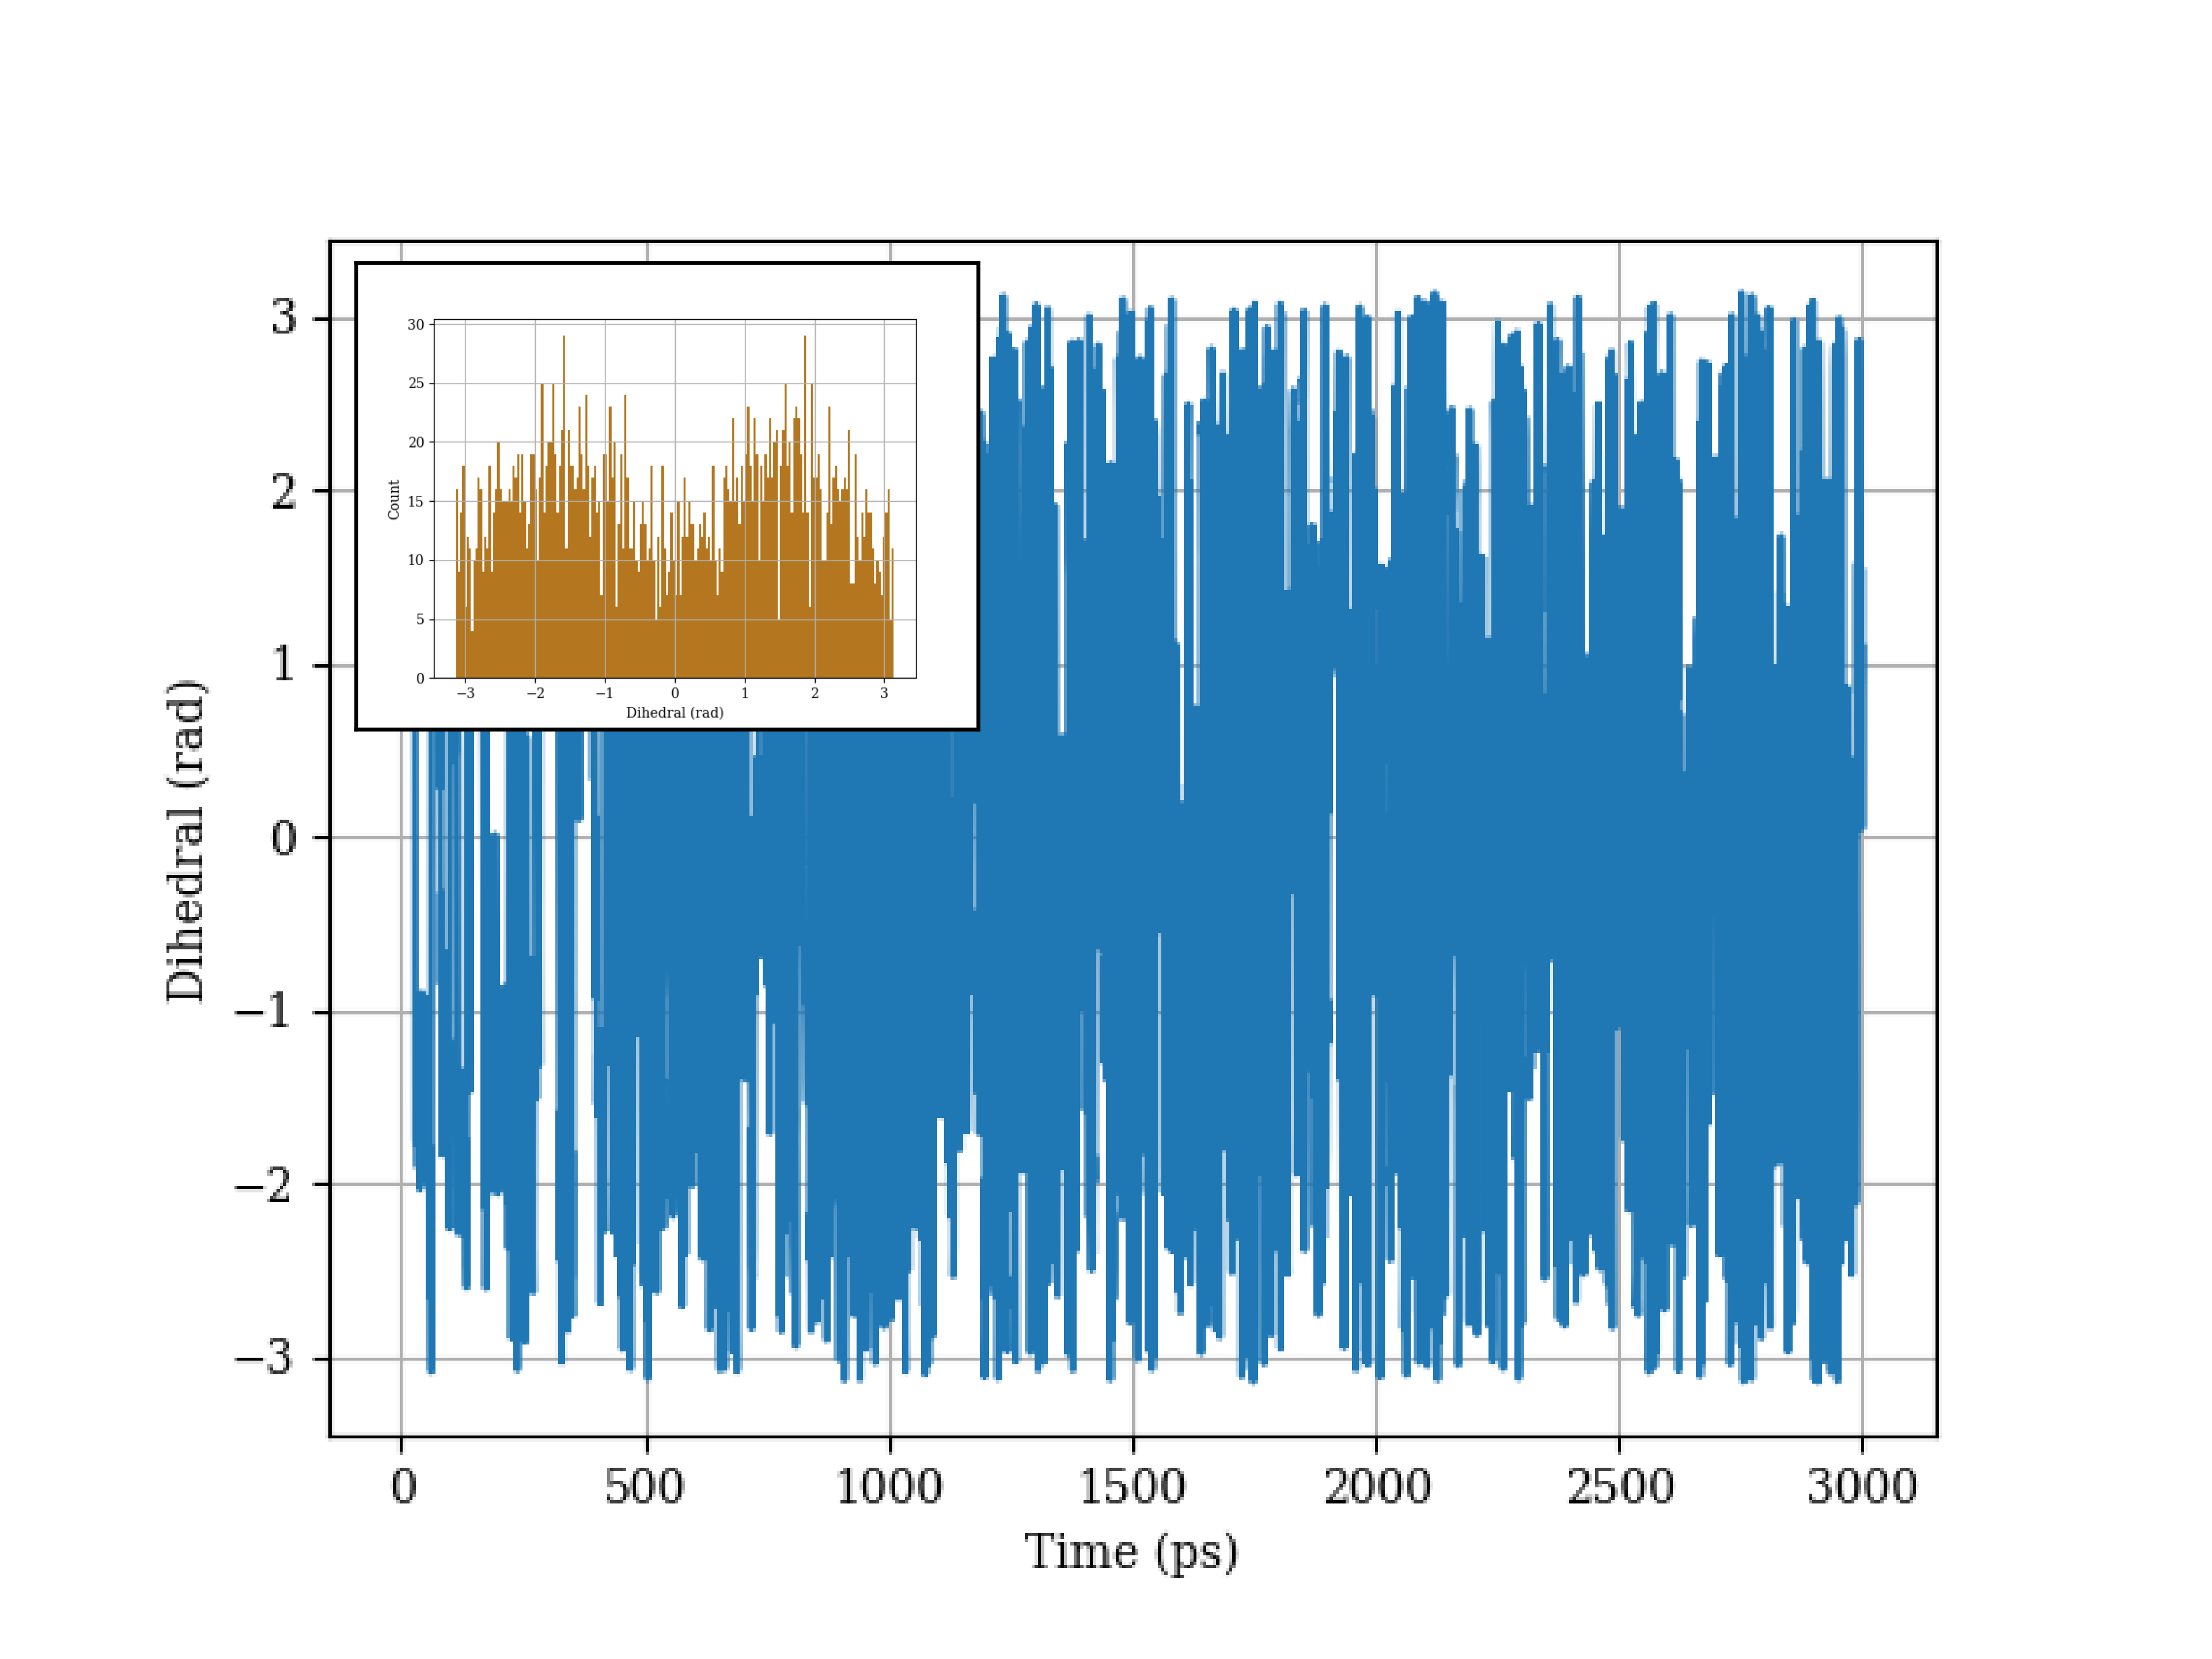

In [10]:
Image('dihedral_embedded.png', width=400)

---
Below we delete the output files generated in this tutorial to make the repository as lightweight as possible.

In [11]:
import os, glob
files = glob.glob('*.png')
files.extend(glob.glob('*txt'))
for i in files:
    os.remove(i)